# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

In [ ]:
goals lets deep dive more on EDA visualizations plot two variables against one another
1. create some subplots of variables

Be able to predict the salaries of various job postings

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn as sk
#etc

#your info here
__author__ = "Jared Teerlink"
__email__ = "jteerlink@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('../Data/train_features.csv')
train_salaries = pd.read_csv('../Data/train_salaries.csv')
test_features = pd.read_csv('../Data/test_features.csv')


### ---- 3 Clean the data ----

In [3]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it



train_combined = train_features.merge(train_salaries, on = 'jobId', how = 'left')
train_combined = train_combined[train_combined.salary > 0]
train_combined.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [4]:
train_combined.drop(labels = ['jobId', 'companyId'],inplace=True,axis=1)
                      
# train_combined = train_combined.drop(,inplace=True)




In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(train_combined)

In [5]:
train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 7 columns):
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(4)
memory usage: 61.0+ MB


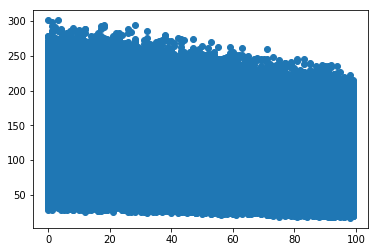

In [7]:
plt.scatter(train_combined.milesFromMetropolis,train_combined.salary)

In [6]:
train_combined.groupby(['jobType','degree'])['salary'].mean()



jobType         degree     
CEO             BACHELORS      148.421009
                DOCTORAL       158.232849
                HIGH_SCHOOL    135.629182
                MASTERS        153.254510
                NONE           130.796690
CFO             BACHELORS      138.508706
                DOCTORAL       148.308742
                HIGH_SCHOOL    125.964395
                MASTERS        143.316243
                NONE           121.135389
CTO             BACHELORS      138.363172
                DOCTORAL       148.269262
                HIGH_SCHOOL    126.082232
                MASTERS        143.582019
                NONE           120.939193
JANITOR         HIGH_SCHOOL     70.976821
                NONE            70.649575
JUNIOR          BACHELORS       98.130267
                DOCTORAL       108.356035
                HIGH_SCHOOL     85.791986
                MASTERS        103.463304
                NONE            80.884064
MANAGER         BACHELORS      118.173795
      

In [5]:
#Dummy Variables
# major = pd.get_dummies(train_combined['major'], prefix_sep='_', drop_first=True)

industry = pd.get_dummies(train_combined['industry'], prefix_sep='_', drop_first=True)

train_combined = pd.concat([train_combined, industry], axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

# major_coded = label_enc.fit_transform(train_combined['major'])


industry_coded = label_enc.fit_transform(train_combined['industry'])

# train_combined = pd.concat([train_combined, major_coded, industry_coded], axis=1)

# train_combined['major_enc'] = major_coded
train_combined['industry_enc'] = industry_coded

In [6]:
train_combined.dropna()

,jobType,degree,industry,yearsExperience,milesFromMetropolis,salary,industry_enc
0,CFO,MASTERS,HEALTH,10,83,130,3
1,CEO,HIGH_SCHOOL,WEB,3,73,101,6
2,VICE_PRESIDENT,DOCTORAL,HEALTH,10,38,137,3
3,MANAGER,DOCTORAL,AUTO,8,17,142,0
4,VICE_PRESIDENT,BACHELORS,FINANCE,8,16,163,2
5,MANAGER,DOCTORAL,FINANCE,2,31,113,2
6,CFO,NONE,HEALTH,23,24,178,3
7,JUNIOR,BACHELORS,EDUCATION,9,70,73,1
8,JANITOR,HIGH_SCHOOL,EDUCATION,1,54,31,1
9,VICE_PRESIDENT,BACHELORS,AUTO,17,68,104,0


In [7]:
# Ordinal Encoding - degree and jobtype

degree = [['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL']]
degree_array = np.asarray(train_combined.degree).reshape(-1,1)

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=degree)
degree_ord = enc.fit_transform(degree_array)

train_combined['degree_ord'] = degree_ord
# ordered by average salary
titles = [['JANITOR', 'JUNIOR', 'SENIOR', 'MANAGER', 'VICE_PRESIDENT', 'CFO', 'CTO', 'CEO']]
titles_array = np.asarray(train_combined.jobType).reshape(-1,1)

enc = OrdinalEncoder(categories=titles)
titles_ord = enc.fit_transform(titles_array)

train_combined['jobType_ord'] = titles_ord

In [8]:
#prepare final data frames

train_num = train_combined.select_dtypes(exclude = 'object')



train_final = train_num.drop(['salary'],axis=1)

train_salary = train_combined['salary']

In [11]:
train_final = train_final.drop(['industry_enc'],axis = 1)
train_final.head()

,yearsExperience,milesFromMetropolis,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,degree_ord,jobType_ord
0,10,83,0,0,1,0,0,0,3.0,5.0
1,3,73,0,0,0,0,0,1,1.0,7.0
2,10,38,0,0,1,0,0,0,4.0,4.0
3,8,17,0,0,0,0,0,0,4.0,3.0
4,8,16,0,1,0,0,0,0,2.0,4.0


In [15]:
train_num.head()

,yearsExperience,milesFromMetropolis,salary,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,industry_enc,degree_ord,jobType_ord
0,10,83,130,0,0,1,0,0,0,3,3.0,5.0
1,3,73,101,0,0,0,0,0,1,6,1.0,7.0
2,10,38,137,0,0,1,0,0,0,3,4.0,4.0
3,8,17,142,0,0,0,0,0,0,0,4.0,3.0
4,8,16,163,0,1,0,0,0,0,2,2.0,4.0


In [10]:
print(set(train_num['degree_ord']), set(train_num['jobType_ord']))

# degree 2-4 and type4-7 ==A
# degree 0-1 and type4-7 ==B
# degree 2-4 and type2-3 ==C
# degree 0-1 and type2-3 ==D
# degree 2-4 and type0-1 ==E
# degree 0-1 and type0-1 ==F

def reclassjob(df):
    #some informative note should go here
    if (2 <= df.degree_ord <= 4 and 4 <= df.jobType_ord <= 7):
        return 5
    elif (0 <= df.degree_ord <= 1 and 4 <= df.jobType_ord <= 7):
        return 4
    elif (2 <= df.degree_ord <= 4 and 2 <= df.jobType_ord <= 3):
        return 3
    elif (0 <= df.degree_ord <= 1 and 2 <= df.jobType_ord <= 3):
        return 2
    elif (2 <= df.degree_ord <= 4 and 0 <= df.jobType_ord <= 1):
        return 1
    else:
        return 0
        

{0.0, 1.0, 2.0, 3.0, 4.0} {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


In [11]:
train_num['customclass'] = train_num.apply(reclassjob,axis=1)

c:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
train_salary.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

### ---- 4 Explore the data (EDA) ----

In [30]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

train_features.describe()

train_features.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [45]:
train_combined.describe()

count    999995.000000
mean          5.419788
std           2.398849
min           0.000000
25%           4.000000
50%           7.000000
75%           7.000000
max           8.000000
Name: major_enc, dtype: float64

<BarContainer object of 5 artists>

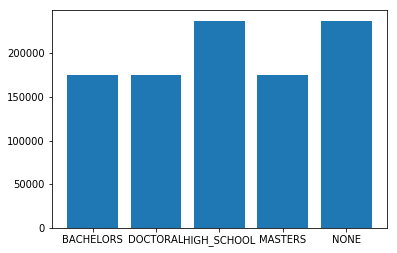

In [12]:
x = train_combined.degree.groupby(train_combined['degree']).count()

plt.bar(x.index,x)

In [8]:
numerical_features = ['yearsExperience','milesFromMetropolis']
cat_features = ['jobType','degree','industry']

subsize = str(round(len(cat_features))-1)

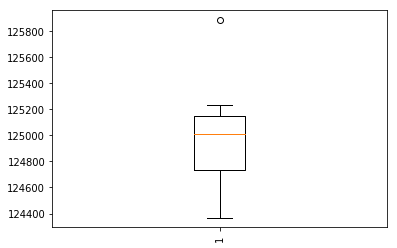

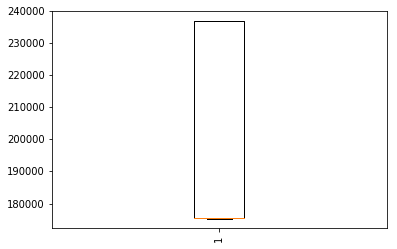

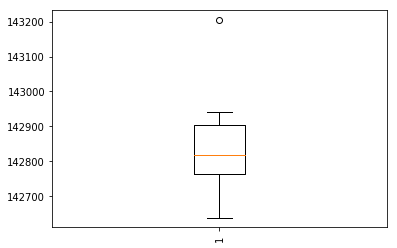

In [9]:
def cat_bar(x,y):
    data = x.groupby(x).count()  
#     plt.bar(data.index,data)
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.show()


for i in cat_features:
    cat_bar(train_combined[i],cat_features)


In [60]:
train_combined[train_combined.salary>100].groupby(train_combined['jobType']).mean()

,yearsExperience,milesFromMetropolis,salary,industry_enc,degree_ord,jobType_ord
jobType,,,,,,
CEO,12.485572,48.066349,150.155763,3.036681,2.085008,7.0
CFO,12.798705,47.162137,143.129997,3.069546,2.126334,5.0
CTO,12.828036,47.146234,143.208874,3.071490,2.131332,6.0
JANITOR,18.983989,24.799126,116.452803,3.278742,0.507780,0.0
JUNIOR,15.628084,38.185723,124.715868,3.211292,2.481544,1.0
MANAGER,13.936937,43.721678,132.074810,3.126911,2.282197,3.0
SENIOR,14.707006,41.009145,128.144101,3.175402,2.392599,2.0
VICE_PRESIDENT,13.304653,45.603642,137.178290,3.104158,2.201350,4.0


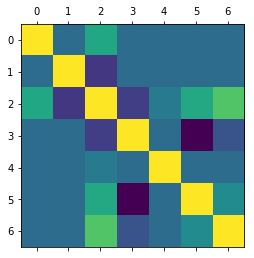

In [39]:
plt.matshow(train_combined.corr())
plt.show()

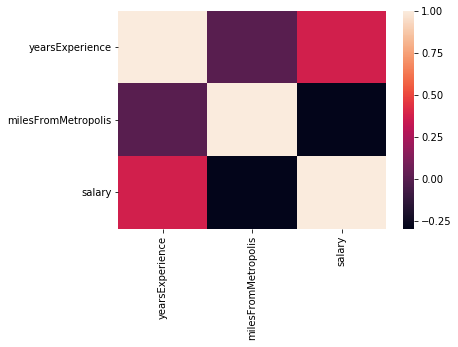

In [10]:
sns.heatmap(train_combined.corr())

In [52]:
train_combined.dtypes
# train_combined.corr()

# drop major 
train_combined = train_combined.drop('major_enc',axis=1)

### ---- 5 Establish a baseline ----

In [13]:
from sklearn.model_selection import train_test_split

train_num_features, test_num_features, train_num_label, test_num_label = train_test_split(train_final,train_salary)

In [14]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation


from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)

model = lm.fit(train_num_features,train_num_label)
predict = model.predict(test_num_features)


In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_num_label,predict)

412.4768313267906

In [ ]:
410.3944048673012

In [82]:
train_num_features.describe()

,yearsExperience,milesFromMetropolis,industry_enc
count,749996.000000,749996.000000,749996.000000
mean,11.994971,49.534714,3.001663
std,7.212770,28.878453,2.000710
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,1.000000
50%,12.000000,50.000000,3.000000
75%,18.000000,75.000000,5.000000
max,24.000000,99.000000,6.000000


### ---- 6 Hypothesize solution ----

In [19]:
# Ridge Regression or ElasticNet to help alleviate difficulty in predicting less frequent jobtypes
# RandomForestRegressor

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [20]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [16]:
#sklearn.linear_model.ElasticNetCV

from sklearn.linear_model import ElasticNetCV

enr = ElasticNetCV(max_iter=10000,cv=5,n_jobs=-1)

model = enr.fit(train_num_features,train_num_label)

predict = model.predict(test_num_features)

mean_squared_error(test_num_label,predict)




492.35306629897866

In [ ]:
489.4892428466449

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,n_jobs = -1)
model = rf.fit(train_num_features,train_num_label)
predict = model.predict(test_num_features)
mean_squared_error(test_num_label,predict)

498.50002597691974

In [ ]:
498.50002597691974

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf.params

In [ ]:
# sklearn.ensemble.RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Number of trees in random forest
n_estimators = [250,500,750]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6, 8]
warm_start = [True,False]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'warm_start': warm_start
               }
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 3, verbose=3, n_jobs = 3,scoring='neg_mean_squared_error',n_iter=50)
# Fit the random search model
rf_grid.fit(train_num_features,train_num_label)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 80.4min


In [18]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_num_features,label = train_num_label,nthread=-1)
# param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
# num_round = 10
bst = xgb.XGBRFRegressor(n_estimators=500,objective='reg:squarederror',n_jobs=-1)
model = bst.fit(train_num_features,train_num_label)
predict = model.predict(test_num_features)

mean_squared_error(test_num_label,predict)


c:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


732.9599909600503

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data